### MA(2) with $\theta_1 = 1$ and $\theta_2 = -0.6$

In [3]:
import  numpy as np

def shift_array(arr, by=1, fill=lambda : 0):
    shifted = np.empty_like(arr)
    if by > 0:
        shifted[:by] = fill()
        shifted[by:] = arr[:-by]
    elif by < 0:
        shifted[by:] = fill()
        shifted[:by] = arr[-by:]
    return shifted

def MA2_seq(thetas, n = 10, prnd=np.random.normal):
    es = np.random.normal(size=3)
    yield es[0]
    es = shift_array(es, fill=np.random.normal)
    yield es[0] - thetas[0]*es[1]
    es = shift_array(es, fill=np.random.normal)
    for _ in range(n):
        yield es[0] - es[1]*thetas[0] - es[2]*thetas[1]
        es = shift_array(es, fill=np.random.normal)

In [4]:
thetas = np.array([1.0, -0.6])
Y = [r for r in MA2_seq(thetas, n=1000)]

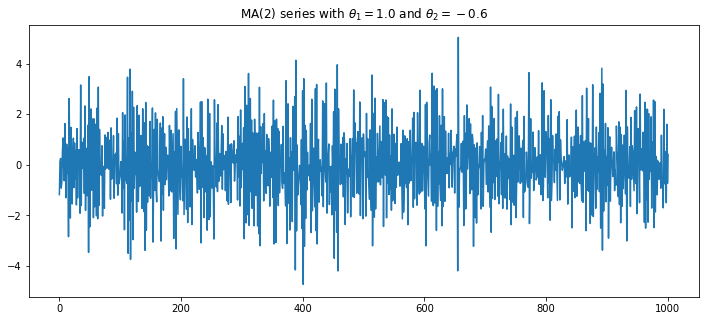

In [5]:
import matplotlib.pyplot as plt

x = [t for t in range(1002)]
fig, ax = plt.subplots(figsize=(12,5))
ax.set_title(f'MA(2) series with $\\theta_1={thetas[0]}$ and $\\theta_2={thetas[1]}$')
ax.plot(x, Y)
_ = plt.show()

### Plot $[Y_t, Y_{t-1}]$

[-0.683846   -0.01672948]


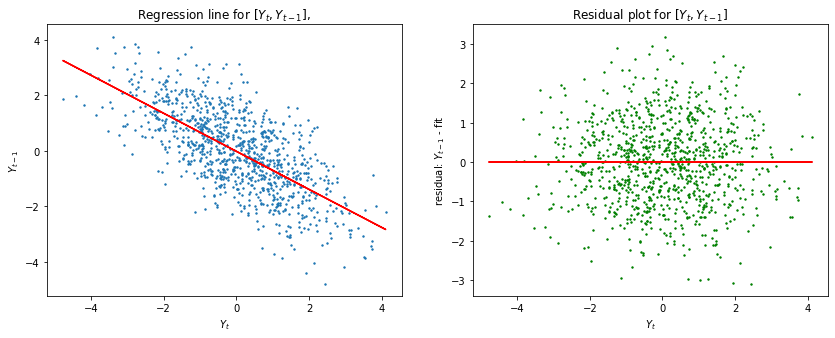

In [4]:
# compare Y_t and Y_{t-1}.  Generate a fitted line and show residuals
Y_t = np.array(Y[2:], dtype=np.float64)
Y_t_1 = np.array(Y[1:-1], dtype=np.float64)
Y_t_2 = np.array(Y[:-2], dtype=np.float64)

params = np.polyfit(Y_t, Y_t_1, 1)
print(params)
fit = params[1] + params[0]*Y_t
fig, axs = plt.subplots(1,2,figsize=(14,5))
axs[0].scatter(Y_t, Y_t_1, s=2)
axs[0].plot(Y_t, fit, color="red")
axs[0].set_xlabel('$Y_t$')
axs[0].set_ylabel('$Y_{t-1}$')
axs[0].set_title(f'Regression line for $[Y_t, Y_{{t-1}}]$, ')

# residual plot
axs[1].scatter(Y_t, Y_t_1 - fit, s=2, color="green")
axs[1].plot(Y_t, np.zeros(Y_t.shape[0]), color="red")
axs[1].set_xlabel('$Y_t$')
axs[1].set_ylabel('residual: $Y_{t-1}$ - fit')
axs[1].set_title('Residual plot for $[Y_t, Y_{t-1}]$')

_=plt.show()

In [5]:
# calculate the expectation and the standard deviation of the residuals
residuals = Y_t_1 - fit
print(residuals.mean())
print(residuals.std())

4.796163466380676e-17
1.0722301182448237


### Plot $[Y_t, Y_{t-2}]$

[ 0.26585579 -0.00794767]


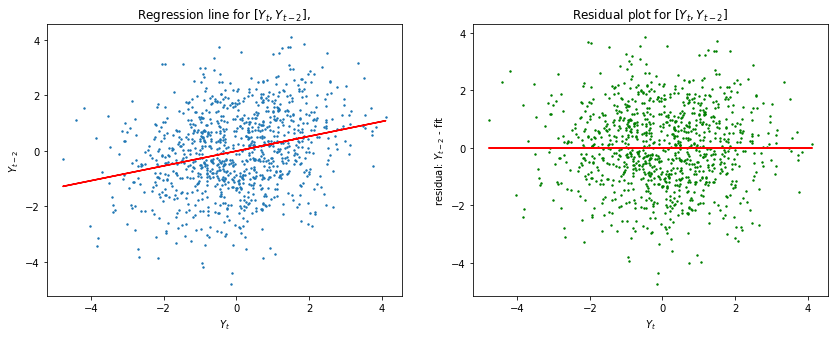

In [6]:
params = np.polyfit(Y_t, Y_t_2, 1)
print(params)
fit = params[1] + params[0]*Y_t
fig, axs = plt.subplots(1,2,figsize=(14,5))
axs[0].scatter(Y_t, Y_t_2, s=2)
axs[0].plot(Y_t, fit, color="red")
axs[0].set_xlabel('$Y_t$')
axs[0].set_ylabel('$Y_{t-2}$')
axs[0].set_title(f'Regression line for $[Y_t, Y_{{t-2}}]$, ')

# residual plot
axs[1].scatter(Y_t, Y_t_2 - fit, s=2, color="green")
axs[1].plot(Y_t, np.zeros(Y_t.shape[0]), color="red")
axs[1].set_xlabel('$Y_t$')
axs[1].set_ylabel('residual: $Y_{t-2}$ - fit')
axs[1].set_title('Residual plot for $[Y_t, Y_{t-2}]$')

_=plt.show()

In [7]:
# calculate the expectation and the standard deviation of the residuals
residuals = Y_t_2 - fit
print(residuals.mean())
print(residuals.std())

-1.1102230246251566e-17
1.4163315080427241


In [ ]:
# TODO: plot some other MA(2) 